In [1]:
#  1. Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import joblib

In [2]:
#  2. Charger les données
df = pd.read_csv("telco-customer-churn.csv")

In [3]:
#suppression de la colonne customerID parce qu'elle n’apporte aucune valeur analytique et Ne contribue pas à la prédiction du churn
#suppression de la colonne gender parce qu'nn général, le genre n’a pas d’impact significatif sur le churn
columns_to_drop = ["customerID", "gender"]
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

print("Colonnes supprimées :", columns_to_drop)

Colonnes supprimées : ['customerID', 'gender']


In [4]:
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
print("Colonnes disponibles :", df.columns)

Colonnes disponibles : Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
#  5. Vérification des valeurs manquantes
print(df.isnull().sum())

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# Gestion des valeurs manquantes
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].fillna(df[column].mode()[0])  # Mode pour les catégories
    else:
        df[column] = df[column].fillna(df[column].mean())  # Moyenne pour les nombres

In [7]:
# Numérisation des données catégoriques
label_encoders = {}
for column in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [8]:
# Normalisation des données
X = df.drop(columns=["Churn"])  # Remplace "Churn" par le vrai nom de la colonne cible
y = df["Churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Initialisation des modèles
models = {
    "Arbre de décision": DecisionTreeClassifier(),
    "Forêt aléatoire": RandomForestClassifier(),
    "Régression logistique": LogisticRegression(),
    "Réseau de neurones": MLPClassifier(max_iter=500)
}

In [11]:
# Entraînement des modèles
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} entraîné avec succès !")

Arbre de décision entraîné avec succès !
Forêt aléatoire entraîné avec succès !
Régression logistique entraîné avec succès !
Réseau de neurones entraîné avec succès !


c:\Users\PAST PAUL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# Évaluation des modèles
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))

=== Arbre de décision ===
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1036
           1       0.49      0.46      0.47       373

    accuracy                           0.73      1409
   macro avg       0.65      0.64      0.64      1409
weighted avg       0.72      0.73      0.73      1409

=== Forêt aléatoire ===
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409

=== Régression logistique ===
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75     

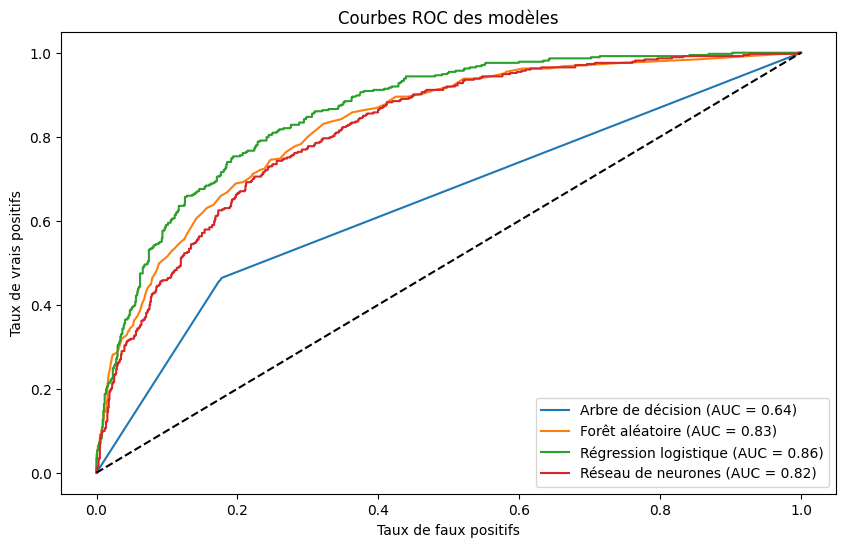

In [13]:
# Tracer la courbe ROC
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbes ROC des modèles")
plt.legend()
plt.show()

In [1]:
"""La régression logistique (AUC = 0.86) est le modèle le plus performant, suivi de la forêt aléatoire (AUC = 0.83)
et du réseau de neurones (AUC = 0.82), qui offrent également de bons résultats. En revanche, l’arbre de décision 
(AUC = 0.64) est le moins performant et a du mal à discriminer correctement les classes.

 Meilleur choix : Régression logistique
 Alternatives viables : Forêt aléatoire et réseau de neurones
 À éviter : Arbre de décision"""

'La régression logistique (AUC = 0.86) est le modèle le plus performant, suivi de la forêt aléatoire (AUC = 0.83)\net du réseau de neurones (AUC = 0.82), qui offrent également de bons résultats. En revanche, l’arbre de décision \n(AUC = 0.64) est le moins performant et a du mal à discriminer correctement les classes.\n\n Meilleur choix : Régression logistique\n Alternatives viables : Forêt aléatoire et réseau de neurones\n À éviter : Arbre de décision'

In [14]:
# Sauvegarde des modèles
for name, model in models.items():
    joblib.dump(model, f"{name.replace(' ', '_').lower()}.model")

In [15]:
# Sauvegarde des données de test
np.savetxt("X_test.csv", X_test, delimiter=",")
joblib.dump(y_test, "y_test.pkl")  # Sauvegarde y_test au format pickle
print("Modèles et données de test sauvegardés !")

Modèles et données de test sauvegardés !
